📂 Please upload your dataset ZIP file (containing face images)...


Saving archive (7).zip to archive (7).zip
✅ Dataset extracted to: /content/dataset_faces
📸 Found 11792 images in dataset.


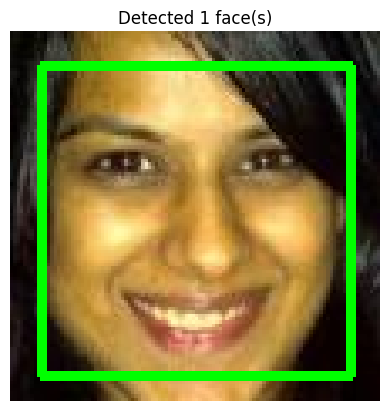

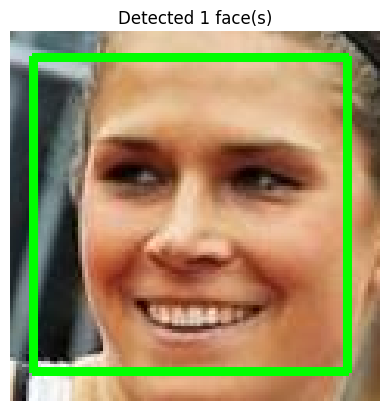

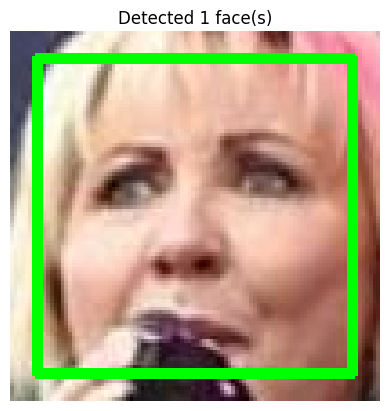

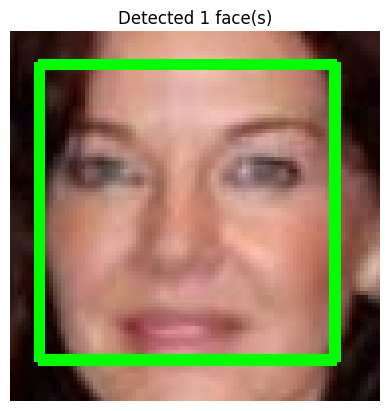

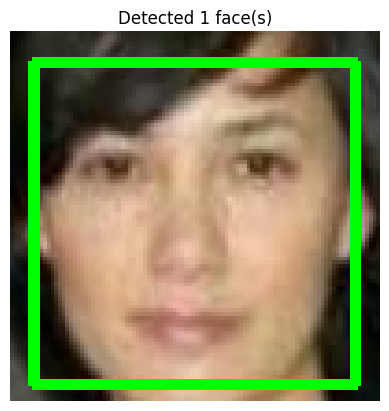

✅ Face detection completed on sample images.


In [ ]:
# ================================================
# 👁️ FACE DETECTION ON USER-UPLOADED DATASET
# ================================================

import cv2
import os
import zipfile
from google.colab import files
import matplotlib.pyplot as plt

# ================================================
# 1️⃣ Upload dataset (ZIP file containing images)
# ================================================
print("📂 Please upload your dataset ZIP file (containing face images)...")
uploaded = files.upload()

# Get uploaded ZIP filename
for fn in uploaded.keys():
    zip_filename = fn

# Extract dataset
extract_folder = "/content/dataset_faces"
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"✅ Dataset extracted to: {extract_folder}")

# ================================================
# 2️⃣ Load OpenCV Face Detection Model
# ================================================
# You can choose Haar Cascade or DNN method
# Haar Cascade (simple and fast)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ================================================
# 3️⃣ Detect faces in images
# ================================================
image_extensions = [".jpg", ".jpeg", ".png", ".bmp"]
image_paths = [
    os.path.join(root, file)
    for root, _, files in os.walk(extract_folder)
    for file in files
    if os.path.splitext(file)[1].lower() in image_extensions
]

print(f"📸 Found {len(image_paths)} images in dataset.")

# Detect and display results for first 5 images
for idx, image_path in enumerate(image_paths[:5]):
    img = cv2.imread(image_path)
    if img is None:
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {len(faces)} face(s)")
    plt.axis("off")
    plt.show()

print("✅ Face detection completed on sample images.")
